In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [117]:
df=pd.read_csv('CLEANED_CDX.csv')

df.head

<bound method NDFrame.head of             Date  SPX Index   VIX Index  (L1)  \
0     2024-02-16     5005.57            14.24   
1     2024-02-15     5029.73            14.01   
2     2024-02-14     5000.62            14.38   
3     2024-02-13     4953.17            15.85   
4     2024-02-12     5021.84            13.93   
...          ...         ...              ...   
2872  2012-08-15     1405.53            14.63   
2873  2012-08-14     1403.93            14.85   
2874  2012-08-13     1404.11            13.70   
2875  2012-08-10     1405.87            14.74   
2876  2012-08-09     1402.80            15.28   

      Freddie Mac 30 Year Mortgage Rate  \
0                                  7.31   
1                                  7.24   
2                                  7.29   
3                                  7.25   
4                                  7.14   
...                                 ...   
2872                               3.65   
2873                               3.

In [118]:
df.isnull().any()

Date                                           False
SPX Index                                      False
VIX Index  (L1)                                False
Freddie Mac 30 Year Mortgage Rate               True
U.S. 5-year Treasury constant maturity rate    False
CDX HY Spread                                  False
CDX IG Spread                                  False
dtype: bool

<AxesSubplot:>

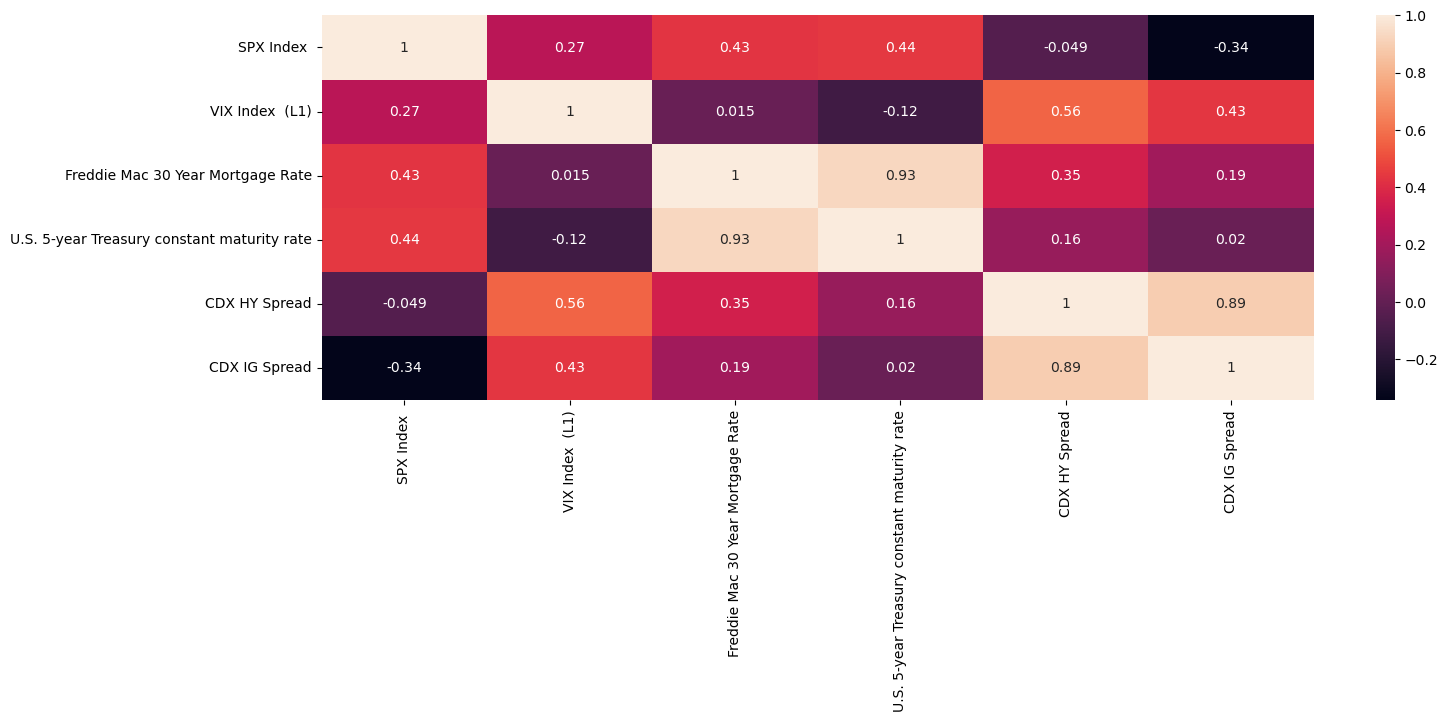

In [119]:
plt.figure(figsize = (16,5))
corr = df.select_dtypes('number').corr()
sn.heatmap(corr,annot=True)

In [120]:
df['Date']=pd.to_datetime(df['Date'],errors='coerce')

In [121]:
new_df=df[df['Date']>'08-08-2012']

In [122]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [123]:
endog=new_df['CDX IG Spread'] 
exdog=new_df.drop(columns=['CDX IG Spread'])

model=SARIMAX(endog,exdog=exdog,order=(1,1,1),seasonal_order=(1,1,1,12)) 
results=model.fit()

print(results.summary())

new_df['fitted']=results.fittedvalues 
forecast=results.get_forecast(steps=12) 
df_forecast=forecast.summary_frame()

In [124]:
from statsmodels.tsa.stattools import adfuller

In [125]:
dickey=adfuller(new_df['CDX IG Spread'])

In [126]:
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.277109
p-value: 0.015933
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [127]:
dickey=adfuller(new_df['CDX HY Spread'])

In [128]:
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.257208
p-value: 0.016903
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [129]:
dickey=adfuller(new_df['SPX Index '])

In [130]:
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.354591
p-value: 0.603842
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [131]:
dickey=adfuller(new_df['VIX Index  (L1)'])

In [132]:
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.542737
p-value: 0.000002
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


# Dropping Freddie Null Values

In [133]:
new_df.isnull().sum()

Date                                            0
SPX Index                                       0
VIX Index  (L1)                                 0
Freddie Mac 30 Year Mortgage Rate              16
U.S. 5-year Treasury constant maturity rate     0
CDX HY Spread                                   0
CDX IG Spread                                   0
dtype: int64

In [134]:
new_df=df[~df.isnull().any(axis=1)]

In [135]:
new_df.isnull().sum()

Date                                           0
SPX Index                                      0
VIX Index  (L1)                                0
Freddie Mac 30 Year Mortgage Rate              0
U.S. 5-year Treasury constant maturity rate    0
CDX HY Spread                                  0
CDX IG Spread                                  0
dtype: int64

In [136]:
new_df[new_df['Freddie Mac 30 Year Mortgage Rate'].isna()]

,Date,SPX Index,VIX Index (L1),Freddie Mac 30 Year Mortgage Rate,U.S. 5-year Treasury constant maturity rate,CDX HY Spread,CDX IG Spread


In [137]:
dickey=adfuller(new_df['Freddie Mac 30 Year Mortgage Rate'])

In [138]:
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.167412
p-value: 0.218285
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [139]:
dickey=adfuller(new_df['U.S. 5-year Treasury constant maturity rate'])

In [140]:
print('ADF Statistic: %f' % dickey[0])
print('p-value: %f' % dickey[1])
print('Critical Values:')
for key, value in dickey[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.780649
p-value: 0.390110
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


plt.plot(new_df.index, new_df['fitted'], label='Fitted') 
plt.plot(df_forecast.index, df_forecast['mean'], label='Forecast', linestyle='--') 
plt.fill_between(df_forecast.index, df_forecast['mean_ci_lower'], df_forecast['mean_ci_upper'], color='k', alpha=0.1) 
plt.title('SARIMAX Model Results') 
plt.legend() 
plt.show()